In [1]:
# Code adapted from RGBS_generated_training_val files

import os
import numpy as np
import matplotlib.pyplot as plt


os.chdir('/coc/flash3/nwarner30/MaskCLIP/')

#Select the appropriate directory for 
# 'instance' or 'semantic'
from nwarner_common_utils import SETTING, IMG_DIR, ANN_DIR, OUT_PREFIX

SUBSET = 10
# Check setting config in nwarner_common_utils

test_imgs = []
for config in ['val']:
    full_img_dir = IMG_DIR + config
    full_ann_dir = ANN_DIR + config
    WRITTEN_DIR = 'data/VOCdevkit/VOC2012/ImageSets/Segmentation/'
    written_dir_file = open(WRITTEN_DIR+'%s_%s.txt' % (OUT_PREFIX, config), 'w')
    for root, dirs, files in os.walk(full_img_dir, topdown=False):
        for name in files[:SUBSET]:
            indiv_array = np.load(full_img_dir+'/'+name, allow_pickle=True)
            indiv_annotation = np.load(full_ann_dir+'/'+name, allow_pickle=True)
            test_imgs.append((indiv_array, indiv_annotation))
    # Also load the GT segmentation for now 
    # Then add the predicted segmentation here, too

In [8]:
%matplotlib inline

def plot_test_img(test_set):
    (test_img, test_ann) = test_set
    rgb_img = test_img[:,:,:3]
    rgb_img = (rgb_img -np.min(rgb_img))/ (np.max(rgb_img)-np.min(rgb_img))


    hmap = test_img[:,:,-2]
    click_map = test_img[:,:,-1]


    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
    #fig.suptitle('Horizontally stacked subplots')
    ax1.imshow(rgb_img)
    ax1.axis('off')
    ax2.imshow(hmap)
    ax2.axis('off')

    click_coords = np.where(click_map!=0)
    # Draw circle to visualize point clearer
    # Circle center is (x,y) so w, h
    circle1 = plt.Circle((click_coords[1].item(), click_coords[0].item()), 5, color='r')
    ax3.imshow(click_map)
    ax3.add_patch(circle1)
    ax3.axis('off')

    # Now plot gt seg
    gt_seg = test_ann
    ax4.imshow(gt_seg)
    ax4.axis('off')

    plt.show()

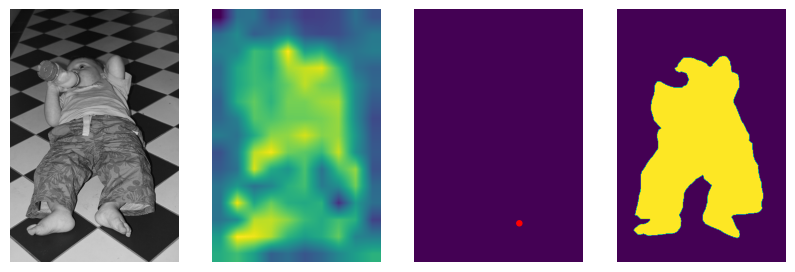

In [9]:
plot_test_img(test_imgs[0])

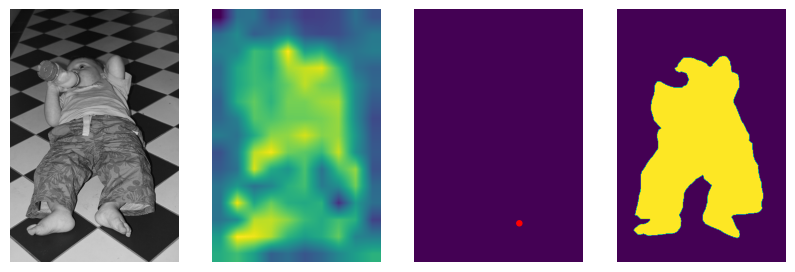

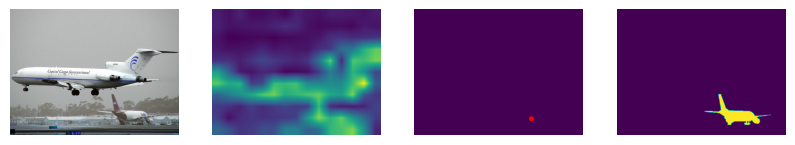

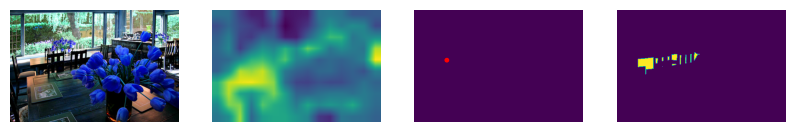

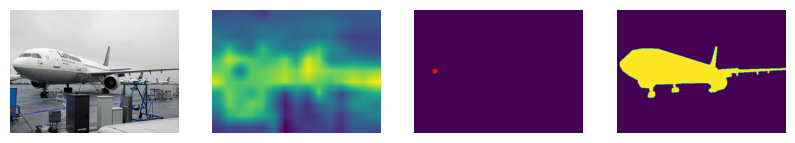

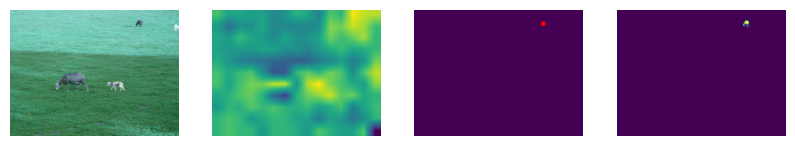

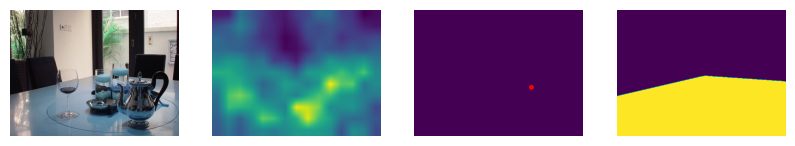

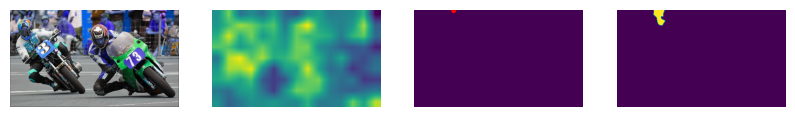

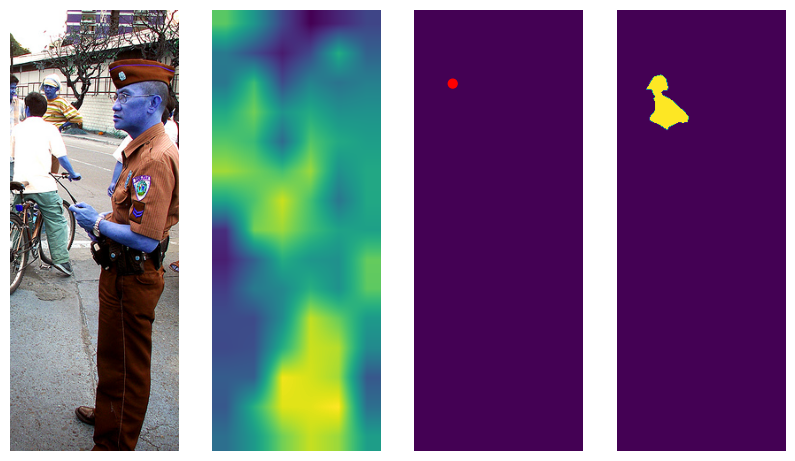

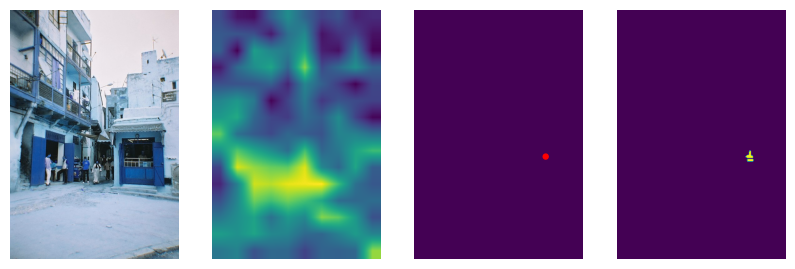

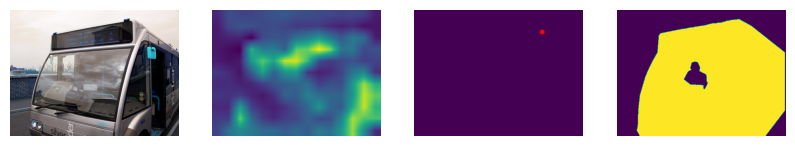

In [10]:
for i in range(SUBSET):
    plot_test_img(test_imgs[i])